# SECTION - I

#### Q1 why is your proposal important in todays world? How predict a good client is worthy for a bank?
Answer- In today's world, proposals are vital as they outline innovative solutions for the financial industry. Predicting credit card applicant suitability through machine learning empowers banks to make informed decisions, reduce risks, and improve customer experiences. This leads to responsible lending, lower default rates, and enhanced financial stability, benefiting both banks and clients in the long run.

#### Q2 How is it going to impact the banking sector?

Answer- Implementing a machine learning-based creditworthiness prediction system in the banking sector will:

1. Reduce financial risks by better assessing client creditworthiness.
2. Improve operational efficiency with faster credit card approvals.
3. Enhance customer experience, loyalty, and trust.
4. Potentially increase profitability through targeted lending.
5. Ensure compliance with financial regulations.
6. Provide valuable data insights.
7. Strengthen fraud detection mechanisms.

Overall, it will significantly impact the sector by enhancing risk management, customer service, and financial performance.

#### Q3 If any, what is the gap in the knowledge, or how your proposed method can be helpful if required in future for any bank in India?

Answer- A machine learning-based creditworthiness prediction system can be helpful for Indian banks in the future by addressing potential gaps in data quality, adapting to local regulations, accommodating customer diversity, ensuring interpretability, scalability, and continual model updating. This technology can enable more informed lending decisions, risk reduction, and enhanced financial inclusion in India.

import the required modules

In [ ]:
import warnings

warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SECTION II

### Initial Hypothesis with DA Track

Answer- To identify patterns in the credit card dataset and important features for a machine learning model, we will conduct exploratory data analysis (EDA) to understand the data's characteristics, correlations, and distributions. Additionally, we will examine factors such as Annual_income, Type_Income and Marital_status, which can influence credit card approval. For feature importance analysis, we will employ techniques like correlation analysis to identify which features have the strongest relationships with credit card approval. This analysis will be crucial for building an accurate creditworthiness prediction model.

# SECTION III

## Data Analysis Approach

#### 1- What approach are you going to take in order to prove or disprove your hypothesis?

Answer- I will perform Exploratory Data Analysis in which i will get the different trends in dataset and able to get deep insights with the help of data visualization. Then after that i will perform feature engineering and give my dataset to ML Models to prove my hypothesis.

#### 2- What feature engineering techniques will be relevant to your project?

Answer- I will simply perform **correlation analysis** on my dataset to get only those features whom have higher relation with my targeted feature **label**.

#### 3- Justify your data analysis approach?

Answer- You can check the below analysis. Firstly i have to identify the main objective for these analysis. After that i haved performed Exploratory Data Analysis to find out the patterns in our dataset. And we can see that the people who is **Unmarried** and have **Academic_degree** will have higher probability to get loan which means that if there is any person whom have loan approval will more likely to have these features.

Now when it comes to ML firstly i have to balanced my dataset because i have very less values for label 0. After that I test 4 different Models and out of these 4 Decision Tree is performing good with accuracy of **0.95**

In [ ]:
credit_card=pd.read_csv('Credit_card.csv')
credit_card.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  
0             NaN               2  
1             NaN               2  
2             NaN               2  
3             NaN               2  
4             NaN               2

In [ ]:
credit_card_label=pd.read_csv('Credit_card_label.csv')
credit_card_label.head()

Ind_ID  label
0  5008827      1
1  5009744      1
2  5009746      1
3  5009749      1
4  5009752      1

#### 4- Identify Important Patterns in your data using EDA approach.

Answer- Below I perform Exploratory Data Analysis to find the insights with justification.

## Exploratory Data Analysis

merge both of the dataset files

In [ ]:
credit_card=credit_card.merge(credit_card_label,on=credit_card_label.Ind_ID)
credit_cards=credit_card.drop(columns=['Ind_ID_y','key_0'],axis=1)

In [ ]:
credit_cards.head()

Ind_ID_x GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0   5008827      M         Y             Y         0       180000.0   
1   5009744      F         Y             N         0       315000.0   
2   5009746      F         Y             N         0       315000.0   
3   5009749      F         Y             N         0            NaN   
4   5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

dataset have some missing values, Let's fill it.

In [ ]:
credit_cards.isnull().sum()

Ind_ID_x             0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
import numpy as np
credit_cards=credit_cards.fillna(method="ffill")
credit_cards=credit_cards.fillna(method="bfill")

Now we have no missing value in it

In [ ]:
credit_cards.isnull().sum()

Ind_ID_x           0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [ ]:
credit_cards.head()

Ind_ID_x GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0   5008827      M         Y             Y         0       180000.0   
1   5009744      F         Y             N         0       315000.0   
2   5009746      F         Y             N         0       315000.0   
3   5009749      F         Y             N         0       315000.0   
4   5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2        -13557.0           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0      Core staff               2      1  
1      Core staff               2      1  
2      Core staff               2      1  
3      Core staff               2      1  
4      Core staff               2      1

# Data Visualization

<Figure size 648x432 with 0 Axes>

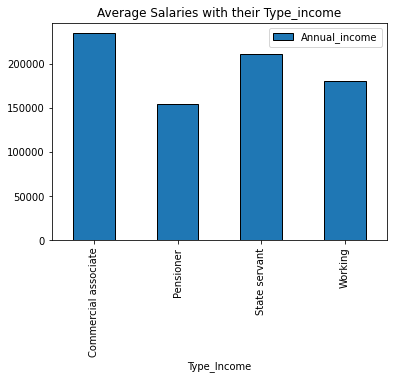

In [ ]:
plt.figure(figsize=[9,6])
credit_cards.groupby('Type_Income').agg({'Annual_income':'mean'}).plot(kind='bar',edgecolor='black')
plt.title('Average Salaries with their Type_income')
plt.show()

<Figure size 648x432 with 0 Axes>

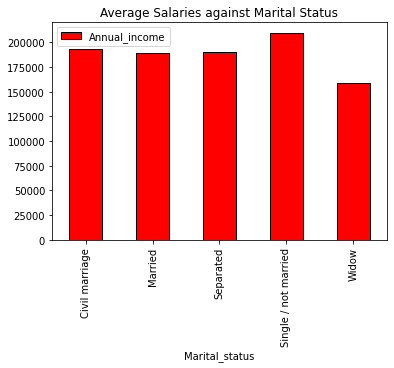

In [ ]:
plt.figure(figsize=[9,6])
credit_cards.groupby('Marital_status').agg({'Annual_income':'mean'}).plot(kind='bar',color='red',edgecolor='black')
plt.title('Average Salaries against Marital Status')
plt.show()

In [ ]:
credit_cards['label'].value_counts()

0    1373
1     175
Name: label, dtype: int64

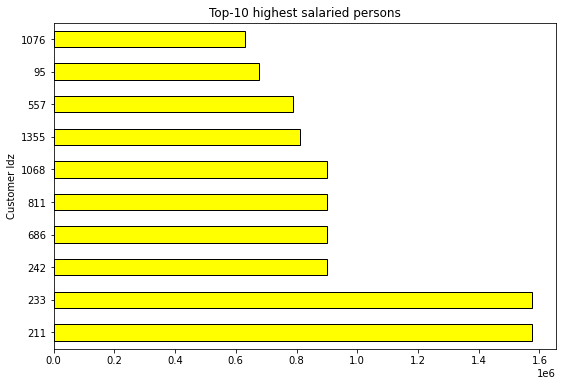

In [ ]:
plt.figure(figsize=[9,6])
credit_cards['Annual_income'].nlargest(10).plot(kind='barh',color='yellow',edgecolor='black')
plt.title('Top-10 highest salaried persons')
plt.ylabel('Customer Idz')
plt.show()

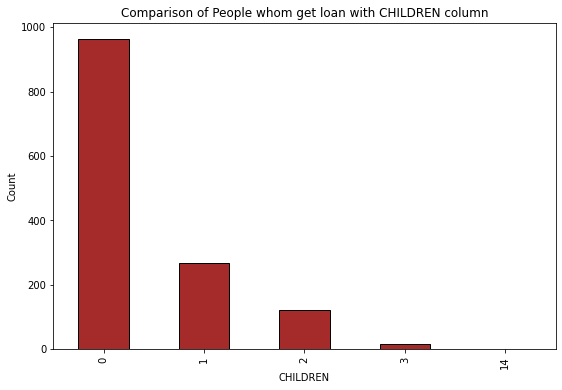

In [ ]:
plt.figure(figsize=[9,6])
cards=credit_cards[credit_cards['label']==0]
cards.groupby('CHILDREN').count()['label'].plot(kind='bar',color='brown',edgecolor='black')
plt.title('Comparison of People whom get loan with CHILDREN column')
plt.ylabel('Count')
plt.show()


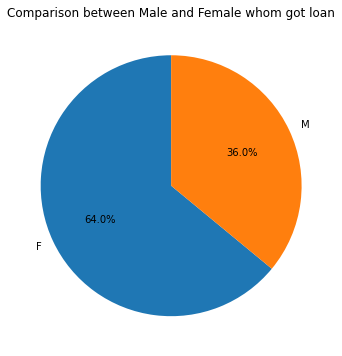

In [ ]:
cards=credit_cards[credit_cards['label']==0]

z=cards.groupby('GENDER').count()['label'].values
label=cards.groupby('GENDER').count()['label'].index
plt.figure(figsize=[9,6])
plt.pie(z,labels=label, autopct='%1.1f%%', startangle=90)
plt.title('Comparison between Male and Female whom got loan')
plt.show()

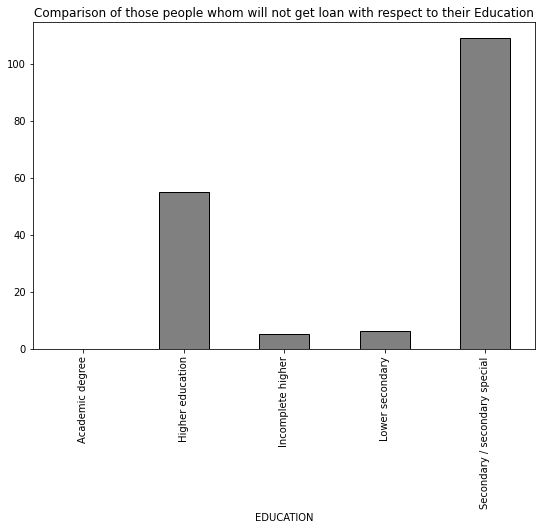

In [ ]:
plt.figure(figsize=[9,6])
credit_cards.groupby('EDUCATION').sum()['label'].plot(kind='bar',color='gray',edgecolor='black',label=True)
plt.title('Comparison of those people whom will not get loan with respect to their Education')
plt.show()

In [ ]:
credit_cards.head()

Ind_ID_x GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0   5008827      M         Y             Y         0       180000.0   
1   5009744      F         Y             N         0       315000.0   
2   5009746      F         Y             N         0       315000.0   
3   5009749      F         Y             N         0       315000.0   
4   5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2        -13557.0           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0      Core staff               2      1  
1      Core staff               2      1  
2      Core staff               2      1  
3      Core staff               2      1  
4      Core staff               2      1

In [ ]:
# Creating a label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Applying label encoding to the 'Category' column
credit_cards['GENDER'] = encoder.fit_transform(credit_cards['GENDER'])
credit_cards['Car_Owner'] = encoder.fit_transform(credit_cards['Car_Owner'])
credit_cards['Propert_Owner'] = encoder.fit_transform(credit_cards['Propert_Owner'])
credit_cards['Type_Income'] = encoder.fit_transform(credit_cards['Type_Income'])
credit_cards['Marital_status'] = encoder.fit_transform(credit_cards['Marital_status'])
credit_cards['EDUCATION'] = encoder.fit_transform(credit_cards['EDUCATION'])
credit_cards['Housing_type'] = encoder.fit_transform(credit_cards['Housing_type'])
credit_cards['Type_Occupation'] = encoder.fit_transform(credit_cards['Type_Occupation'])


In [ ]:
credit_cards.head(5)

Ind_ID_x  GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
0   5008827       1          1              1         0       180000.0   
1   5009744       0          1              0         0       315000.0   
2   5009746       0          1              0         0       315000.0   
3   5009749       0          1              0         0       315000.0   
4   5009752       0          1              0         0       315000.0   

   Type_Income  EDUCATION  Marital_status  Housing_type  Birthday_count  \
0            1          1               1             1        -18772.0   
1            0          1               1             1        -13557.0   
2            0          1               1             1        -13557.0   
3            0          1               1             1        -13557.0   
4            0          1               1             1        -13557.0   

   Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  Type_Occupation  \
0         365243             1           0      0         0                3   
1           -586             1           1      1         0                3   
2           -586             1           1      1         0                3   
3           -586             1           1      1         0                3   
4           -586             1           1      1         0                3   

   Family_Members  label  
0               2      1  
1               2      1  
2               2      1  
3               2      1  
4               2      1

# SECTION - IV

## Machine Learning Approach

## Feature Engineering with Correlation

by doing correlation analysis we will choose only those features who have positive values with targeted feature **label**

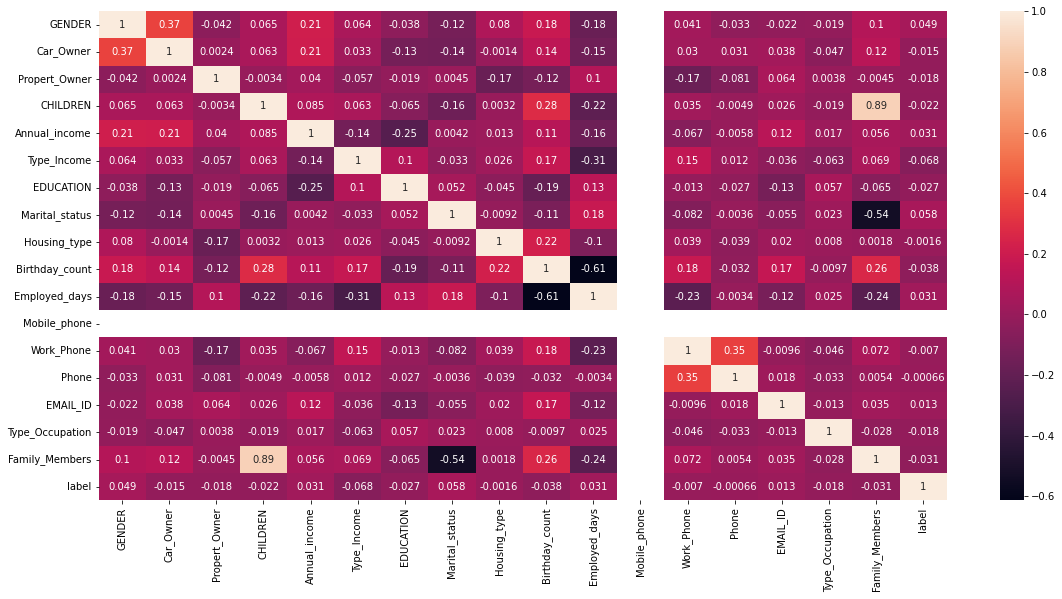

In [ ]:
plt.figure(figsize=[19,9])
sns.heatmap(credit_cards.drop('Ind_ID_x',axis=1).corr(),annot=True)
plt.show()

#### 1. What method will you used for machine learning based prediction for covid19?

Answer- According to the dataset i will go with Binary Classification method because the targeted attribute is **label** and this attribute is in binary form. And in this approach i will use Logistic Regression, Support Vector Machine, Naive Bayes, Decision Tree for prediction.

#### 2. The Most appropriate model

Answer- The **decision tree** model is performing better accross all of the other models. model gives an accuracy 0f **0.95%** and if u check precision and recall both are nearly same, which means model is predicting both of the labels very accurately.

#### 3. Neccassary steps required to improve the accuracy of model.

since dataset is imbalanced so we will balanced the dataset so that model will predict both of the label values accuractely.

In [ ]:
credit_cards['label'].value_counts()

0    1373
1     175
Name: label, dtype: int64

In [ ]:

from sklearn.utils import resample
#create two different dataframe of majority and minority class
df_majority = credit_cards[(credit_cards['label']==0)]
df_minority = credit_cards[(credit_cards['label']==1)]
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= 1373, # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

Now you can see both of the label have same num of records. which means dataset is balanced now.

In [ ]:
df_upsampled['label'].value_counts()

1    1373
0    1373
Name: label, dtype: int64

getting only the positive correlated features

In [ ]:
X=df_upsampled.drop(columns=['Propert_Owner','EDUCATION','Marital_status','Employed_days','Mobile_phone','Work_Phone','Phone','EMAIL_ID','Type_Occupation','label'])
y=df_upsampled['label']

split the dataset into train and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### 4. Performing and comparing all Models (4 Models)

### Logisitc Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [ ]:
pred=model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, pred)
print(f'Accuracy of Logistic Regression: {accuracy:.2f}')

Accuracy of Logistic Regression: 0.56


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.53      0.57      0.55       131
           1       0.58      0.54      0.56       144

    accuracy                           0.56       275
   macro avg       0.56      0.56      0.56       275
weighted avg       0.56      0.56      0.56       275



### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train_scaled,y_train)

SVC()

In [ ]:
pred=model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, pred)
print(f'Accuracy of SVM: {accuracy:.2f}')

Accuracy of SVM: 0.65


### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_DT=DecisionTreeClassifier()
model_DT.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [ ]:
prediction=model_DT.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, prediction)
print(f'Accuracy of Decision Tree: {accuracy:.2f}')
print('\n')
print(classification_report(y_test,prediction))

Accuracy of Decision Tree: 0.95


              precision    recall  f1-score   support

           0       1.00      0.89      0.94       131
           1       0.91      1.00      0.95       144

    accuracy                           0.95       275
   macro avg       0.96      0.95      0.95       275
weighted avg       0.95      0.95      0.95       275



### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_NB=GaussianNB()
model_NB.fit(X_train_scaled,y_train)

GaussianNB()

In [ ]:
pred_NB=model_NB.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_NB)
print(f'Accuracy of Naive Bayes: {accuracy:.2f}')
print('\n')
print(classification_report(y_test,pred_NB))

Accuracy of Naive Bayes: 0.52


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.52      1.00      0.69       144

    accuracy                           0.52       275
   macro avg       0.26      0.50      0.34       275
weighted avg       0.27      0.52      0.36       275



# Thanks